#!pip install Sastrawi

In [14]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import nltk
import nltk
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
import string
import nltk
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [15]:
# Specify the path to your CSV file
file_path = f"hamas1.csv"

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(file_path, delimiter=";")

# Display the DataFrame
display(data)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Mon Dec 11 22:12:46 +0000 2023,1734335442483593689,Gerakan Hamas dalam pernyataan persnya: 🔻 Kam...,0,1,0,0,in,1634147148081270784,1734335442483593689,GazaMedianet7,https://twitter.com/GazaMedianet7/status/17343...
1,Mon Dec 11 22:12:45 +0000 2023,1734335439367287169,@peaceprojeck @AINULYAKIN63709 @bntrlagi @Gres...,0,0,0,0,in,1509112410229346308,1734300378278305936,rauf_widi,https://twitter.com/rauf_widi/status/173433543...
2,Mon Dec 11 22:12:43 +0000 2023,1734335428159828329,@dorra_nawal @amnesty Ask hamas.,0,0,0,0,in,1439896948207767554,1734144267176542510,AgirreManex,https://twitter.com/AgirreManex/status/1734335...
3,Mon Dec 11 22:11:59 +0000 2023,1734335244776722484,Ringkasan jalannya perang di Gaza 10-11 Desemb...,0,0,0,0,in,1339895843042705408,1734335244776722484,Lembayungsyahdu,https://twitter.com/Lembayungsyahdu/status/173...
4,Mon Dec 11 22:11:42 +0000 2023,1734335174979244215,Jinajis sirahell klaim nemu roket-roket Hamas....,0,0,0,0,in,249568344,1734335174979244215,LiliNurAulia,https://twitter.com/LiliNurAulia/status/173433...
...,...,...,...,...,...,...,...,...,...,...,...,...
1501,Mon Dec 11 09:25:53 +0000 2023,1734142451353268401,@reisim_sabri @MOSSADil Gaza = Hamas https://t...,0,0,0,0,in,1401913991643947009,1733739292185211183,ClusterGeneral,https://twitter.com/ClusterGeneral/status/1734...
1502,Mon Dec 11 09:25:44 +0000 2023,1734142410207432903,@katzen_jammer @Avolanza Wahaha biar keliatan ...,0,1,0,1,in,400546371,1733916304971854334,glucklich00,https://twitter.com/glucklich00/status/1734142...
1503,Mon Dec 11 09:25:33 +0000 2023,1734142365835956246,"@Avolanza Makanya Jan maen2 Ama Hamas, Lo para...",0,0,0,0,in,1696913418731859968,1734070049714176135,RSaryani98253,https://twitter.com/RSaryani98253/status/17341...
1504,Mon Dec 11 09:25:12 +0000 2023,1734142277533290615,@SitiMar69086633 @JokoTho99 @OmJ_JeNggot @IDF ...,0,0,0,0,in,1516367045352628226,1733852986798158104,H4BiBLont3,https://twitter.com/H4BiBLont3/status/17341422...


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   created_at           1506 non-null   object
 1   id_str               1506 non-null   int64 
 2   full_text            1506 non-null   object
 3   quote_count          1506 non-null   int64 
 4   reply_count          1506 non-null   int64 
 5   retweet_count        1506 non-null   int64 
 6   favorite_count       1506 non-null   int64 
 7   lang                 1506 non-null   object
 8   user_id_str          1506 non-null   int64 
 9   conversation_id_str  1506 non-null   int64 
 10  username             1506 non-null   object
 11  tweet_url            1506 non-null   object
dtypes: int64(7), object(5)
memory usage: 141.3+ KB


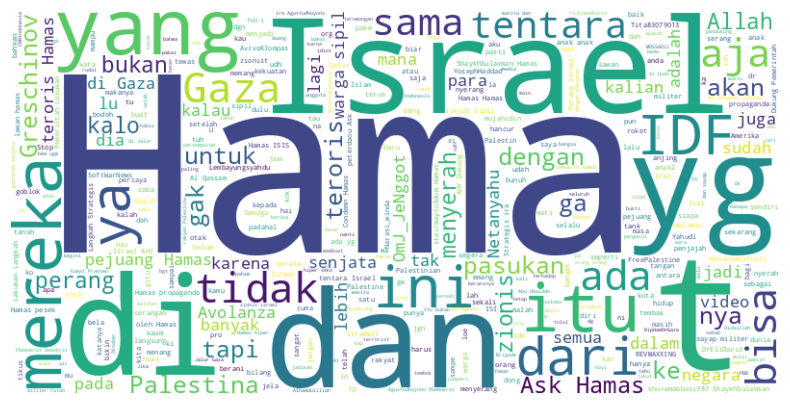

In [17]:
df = ''.join(data['full_text'].tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https','co','RT','...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400)
wc.generate(df)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [18]:
df = pd.DataFrame(data[['full_text']])
df.head(1506)

,full_text
0,Gerakan Hamas dalam pernyataan persnya: 🔻 Kam...
1,@peaceprojeck @AINULYAKIN63709 @bntrlagi @Gres...
2,@dorra_nawal @amnesty Ask hamas.
3,Ringkasan jalannya perang di Gaza 10-11 Desemb...
4,Jinajis sirahell klaim nemu roket-roket Hamas....
...,...
1501,@reisim_sabri @MOSSADil Gaza = Hamas https://t...
1502,@katzen_jammer @Avolanza Wahaha biar keliatan ...
1503,"@Avolanza Makanya Jan maen2 Ama Hamas, Lo para..."
1504,@SitiMar69086633 @JokoTho99 @OmJ_JeNggot @IDF ...


In [19]:
def remove_URL(tweet):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', tweet)

def remove_html(tweet):
    html = re.compile(r'<.*?>')
    return html.sub(r'', tweet)

def remove_emoji(tweet):
    emoji_pattern = re.compile("["
      u"\U0001F600-\U0001F64F"
      u"\U0001F300-\U0001F5FF"
      u"\U0001F680-\U0001F6FF"
      u"\U0001F1E0-\U0001F1FF"
                  "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'',tweet)

def remove_angka(tweet):
    tweet = re.sub('[0-9]+', '', tweet)
    tweet = re.sub(r'\$\w*', '', tweet)
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    return tweet


def remove_punct(tweets):
    translator = str.maketrans('', '', string.punctuation)
    return tweets.translate(translator)

df['cleasing'] = df['full_text'].apply(lambda x: remove_URL(x))
df['cleasing'] = df['cleasing'].apply(lambda x: remove_html(x))
df['cleasing'] = df['cleasing'].apply(lambda x: remove_emoji(x))
df['cleasing'] = df['cleasing'].apply(lambda x: remove_punct(x))
df['cleasing'] = df['cleasing'].apply(lambda x: remove_angka(x))

df.head(1506)

,full_text,cleasing
0,Gerakan Hamas dalam pernyataan persnya: 🔻 Kam...,Gerakan Hamas dalam pernyataan persnya Kami ...
1,@peaceprojeck @AINULYAKIN63709 @bntrlagi @Gres...,peaceprojeck AINULYAKIN bntrlagi Greschinov Is...
2,@dorra_nawal @amnesty Ask hamas.,dorranawal amnesty Ask hamas
3,Ringkasan jalannya perang di Gaza 10-11 Desemb...,Ringkasan jalannya perang di Gaza Desember ...
4,Jinajis sirahell klaim nemu roket-roket Hamas....,Jinajis sirahell klaim nemu roketroket Hamas P...
...,...,...
1501,@reisim_sabri @MOSSADil Gaza = Hamas https://t...,reisimsabri MOSSADil Gaza Hamas
1502,@katzen_jammer @Avolanza Wahaha biar keliatan ...,katzenjammer Avolanza Wahaha biar keliatan uda...
1503,"@Avolanza Makanya Jan maen2 Ama Hamas, Lo para...",Avolanza Makanya Jan maen Ama Hamas Lo para is...
1504,@SitiMar69086633 @JokoTho99 @OmJ_JeNggot @IDF ...,SitiMar JokoTho OmJJeNggot IDF HeHehe Anjing h...


In [20]:
def case_folding(text):
    if isinstance(text, str):
        lowercase_text = text.lower()
        return lowercase_text
    else:
        return text

df['case_folding'] = df['cleasing'].apply(case_folding)
df.head(1506)

,full_text,cleasing,case_folding
0,Gerakan Hamas dalam pernyataan persnya: 🔻 Kam...,Gerakan Hamas dalam pernyataan persnya Kami ...,gerakan hamas dalam pernyataan persnya kami ...
1,@peaceprojeck @AINULYAKIN63709 @bntrlagi @Gres...,peaceprojeck AINULYAKIN bntrlagi Greschinov Is...,peaceprojeck ainulyakin bntrlagi greschinov is...
2,@dorra_nawal @amnesty Ask hamas.,dorranawal amnesty Ask hamas,dorranawal amnesty ask hamas
3,Ringkasan jalannya perang di Gaza 10-11 Desemb...,Ringkasan jalannya perang di Gaza Desember ...,ringkasan jalannya perang di gaza desember ...
4,Jinajis sirahell klaim nemu roket-roket Hamas....,Jinajis sirahell klaim nemu roketroket Hamas P...,jinajis sirahell klaim nemu roketroket hamas p...
...,...,...,...
1501,@reisim_sabri @MOSSADil Gaza = Hamas https://t...,reisimsabri MOSSADil Gaza Hamas,reisimsabri mossadil gaza hamas
1502,@katzen_jammer @Avolanza Wahaha biar keliatan ...,katzenjammer Avolanza Wahaha biar keliatan uda...,katzenjammer avolanza wahaha biar keliatan uda...
1503,"@Avolanza Makanya Jan maen2 Ama Hamas, Lo para...",Avolanza Makanya Jan maen Ama Hamas Lo para is...,avolanza makanya jan maen ama hamas lo para is...
1504,@SitiMar69086633 @JokoTho99 @OmJ_JeNggot @IDF ...,SitiMar JokoTho OmJJeNggot IDF HeHehe Anjing h...,sitimar jokotho omjjenggot idf hehehe anjing h...


In [21]:
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['case_folding'].apply(tokenize)
df.head(1506)

,full_text,cleasing,case_folding,tokenize
0,Gerakan Hamas dalam pernyataan persnya: 🔻 Kam...,Gerakan Hamas dalam pernyataan persnya Kami ...,gerakan hamas dalam pernyataan persnya kami ...,"[gerakan, hamas, dalam, pernyataan, persnya, k..."
1,@peaceprojeck @AINULYAKIN63709 @bntrlagi @Gres...,peaceprojeck AINULYAKIN bntrlagi Greschinov Is...,peaceprojeck ainulyakin bntrlagi greschinov is...,"[peaceprojeck, ainulyakin, bntrlagi, greschino..."
2,@dorra_nawal @amnesty Ask hamas.,dorranawal amnesty Ask hamas,dorranawal amnesty ask hamas,"[dorranawal, amnesty, ask, hamas]"
3,Ringkasan jalannya perang di Gaza 10-11 Desemb...,Ringkasan jalannya perang di Gaza Desember ...,ringkasan jalannya perang di gaza desember ...,"[ringkasan, jalannya, perang, di, gaza, desemb..."
4,Jinajis sirahell klaim nemu roket-roket Hamas....,Jinajis sirahell klaim nemu roketroket Hamas P...,jinajis sirahell klaim nemu roketroket hamas p...,"[jinajis, sirahell, klaim, nemu, roketroket, h..."
...,...,...,...,...
1501,@reisim_sabri @MOSSADil Gaza = Hamas https://t...,reisimsabri MOSSADil Gaza Hamas,reisimsabri mossadil gaza hamas,"[reisimsabri, mossadil, gaza, hamas]"
1502,@katzen_jammer @Avolanza Wahaha biar keliatan ...,katzenjammer Avolanza Wahaha biar keliatan uda...,katzenjammer avolanza wahaha biar keliatan uda...,"[katzenjammer, avolanza, wahaha, biar, keliata..."
1503,"@Avolanza Makanya Jan maen2 Ama Hamas, Lo para...",Avolanza Makanya Jan maen Ama Hamas Lo para is...,avolanza makanya jan maen ama hamas lo para is...,"[avolanza, makanya, jan, maen, ama, hamas, lo,..."
1504,@SitiMar69086633 @JokoTho99 @OmJ_JeNggot @IDF ...,SitiMar JokoTho OmJJeNggot IDF HeHehe Anjing h...,sitimar jokotho omjjenggot idf hehehe anjing h...,"[sitimar, jokotho, omjjenggot, idf, hehehe, an..."


In [22]:
#FILTERING ATAU STOPWORD REMOVAL
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['Filtering/Stopword removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))
df.head(1506)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,full_text,cleasing,case_folding,tokenize,Filtering/Stopword removal
0,Gerakan Hamas dalam pernyataan persnya: 🔻 Kam...,Gerakan Hamas dalam pernyataan persnya Kami ...,gerakan hamas dalam pernyataan persnya kami ...,"[gerakan, hamas, dalam, pernyataan, persnya, k...","[gerakan, hamas, pernyataan, persnya, mengutuk..."
1,@peaceprojeck @AINULYAKIN63709 @bntrlagi @Gres...,peaceprojeck AINULYAKIN bntrlagi Greschinov Is...,peaceprojeck ainulyakin bntrlagi greschinov is...,"[peaceprojeck, ainulyakin, bntrlagi, greschino...","[peaceprojeck, ainulyakin, bntrlagi, greschino..."
2,@dorra_nawal @amnesty Ask hamas.,dorranawal amnesty Ask hamas,dorranawal amnesty ask hamas,"[dorranawal, amnesty, ask, hamas]","[dorranawal, amnesty, ask, hamas]"
3,Ringkasan jalannya perang di Gaza 10-11 Desemb...,Ringkasan jalannya perang di Gaza Desember ...,ringkasan jalannya perang di gaza desember ...,"[ringkasan, jalannya, perang, di, gaza, desemb...","[ringkasan, jalannya, perang, gaza, desember, ..."
4,Jinajis sirahell klaim nemu roket-roket Hamas....,Jinajis sirahell klaim nemu roketroket Hamas P...,jinajis sirahell klaim nemu roketroket hamas p...,"[jinajis, sirahell, klaim, nemu, roketroket, h...","[jinajis, sirahell, klaim, nemu, roketroket, h..."
...,...,...,...,...,...
1501,@reisim_sabri @MOSSADil Gaza = Hamas https://t...,reisimsabri MOSSADil Gaza Hamas,reisimsabri mossadil gaza hamas,"[reisimsabri, mossadil, gaza, hamas]","[reisimsabri, mossadil, gaza, hamas]"
1502,@katzen_jammer @Avolanza Wahaha biar keliatan ...,katzenjammer Avolanza Wahaha biar keliatan uda...,katzenjammer avolanza wahaha biar keliatan uda...,"[katzenjammer, avolanza, wahaha, biar, keliata...","[katzenjammer, avolanza, wahaha, biar, keliata..."
1503,"@Avolanza Makanya Jan maen2 Ama Hamas, Lo para...",Avolanza Makanya Jan maen Ama Hamas Lo para is...,avolanza makanya jan maen ama hamas lo para is...,"[avolanza, makanya, jan, maen, ama, hamas, lo,...","[avolanza, jan, maen, ama, hamas, lo, isriwill..."
1504,@SitiMar69086633 @JokoTho99 @OmJ_JeNggot @IDF ...,SitiMar JokoTho OmJJeNggot IDF HeHehe Anjing h...,sitimar jokotho omjjenggot idf hehehe anjing h...,"[sitimar, jokotho, omjjenggot, idf, hehehe, an...","[sitimar, jokotho, omjjenggot, idf, hehehe, an..."


In [23]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return ' '.join([stemmer.stem(word) for word in text])

df['stemming_data'] = df['Filtering/Stopword removal'].apply(lambda x: stem_text(x))
df.head(1506)



,full_text,cleasing,case_folding,tokenize,Filtering/Stopword removal,stemming_data
0,Gerakan Hamas dalam pernyataan persnya: 🔻 Kam...,Gerakan Hamas dalam pernyataan persnya Kami ...,gerakan hamas dalam pernyataan persnya kami ...,"[gerakan, hamas, dalam, pernyataan, persnya, k...","[gerakan, hamas, pernyataan, persnya, mengutuk...",gera hamas nyata pers kutuk keras perintah pre...
1,@peaceprojeck @AINULYAKIN63709 @bntrlagi @Gres...,peaceprojeck AINULYAKIN bntrlagi Greschinov Is...,peaceprojeck ainulyakin bntrlagi greschinov is...,"[peaceprojeck, ainulyakin, bntrlagi, greschino...","[peaceprojeck, ainulyakin, bntrlagi, greschino...",peaceprojeck ainulyakin bntrlagi greschinov is...
2,@dorra_nawal @amnesty Ask hamas.,dorranawal amnesty Ask hamas,dorranawal amnesty ask hamas,"[dorranawal, amnesty, ask, hamas]","[dorranawal, amnesty, ask, hamas]",dorranawal amnesty ask hamas
3,Ringkasan jalannya perang di Gaza 10-11 Desemb...,Ringkasan jalannya perang di Gaza Desember ...,ringkasan jalannya perang di gaza desember ...,"[ringkasan, jalannya, perang, di, gaza, desemb...","[ringkasan, jalannya, perang, gaza, desember, ...",ringkas jalan perang gaza desember masuk israe...
4,Jinajis sirahell klaim nemu roket-roket Hamas....,Jinajis sirahell klaim nemu roketroket Hamas P...,jinajis sirahell klaim nemu roketroket hamas p...,"[jinajis, sirahell, klaim, nemu, roketroket, h...","[jinajis, sirahell, klaim, nemu, roketroket, h...",jinajis sirahell klaim nemu roketroket hamas a...
...,...,...,...,...,...,...
1501,@reisim_sabri @MOSSADil Gaza = Hamas https://t...,reisimsabri MOSSADil Gaza Hamas,reisimsabri mossadil gaza hamas,"[reisimsabri, mossadil, gaza, hamas]","[reisimsabri, mossadil, gaza, hamas]",reisimsabri mossadil gaza hamas
1502,@katzen_jammer @Avolanza Wahaha biar keliatan ...,katzenjammer Avolanza Wahaha biar keliatan uda...,katzenjammer avolanza wahaha biar keliatan uda...,"[katzenjammer, avolanza, wahaha, biar, keliata...","[katzenjammer, avolanza, wahaha, biar, keliata...",katzenjammer avolanza wahaha biar liat udah ne...
1503,"@Avolanza Makanya Jan maen2 Ama Hamas, Lo para...",Avolanza Makanya Jan maen Ama Hamas Lo para is...,avolanza makanya jan maen ama hamas lo para is...,"[avolanza, makanya, jan, maen, ama, hamas, lo,...","[avolanza, jan, maen, ama, hamas, lo, isriwill...",avolanza jan maen ama hamas lo isriwill badut
1504,@SitiMar69086633 @JokoTho99 @OmJ_JeNggot @IDF ...,SitiMar JokoTho OmJJeNggot IDF HeHehe Anjing h...,sitimar jokotho omjjenggot idf hehehe anjing h...,"[sitimar, jokotho, omjjenggot, idf, hehehe, an...","[sitimar, jokotho, omjjenggot, idf, hehehe, an...",sitimar jokotho omjjenggot idf hehehe anjing h...


In [24]:
#Drop DUplicate Data
df.drop_duplicates(subset ="stemming_data", keep = 'first', inplace = True)
df.head(1506)

,full_text,cleasing,case_folding,tokenize,Filtering/Stopword removal,stemming_data
0,Gerakan Hamas dalam pernyataan persnya: 🔻 Kam...,Gerakan Hamas dalam pernyataan persnya Kami ...,gerakan hamas dalam pernyataan persnya kami ...,"[gerakan, hamas, dalam, pernyataan, persnya, k...","[gerakan, hamas, pernyataan, persnya, mengutuk...",gera hamas nyata pers kutuk keras perintah pre...
1,@peaceprojeck @AINULYAKIN63709 @bntrlagi @Gres...,peaceprojeck AINULYAKIN bntrlagi Greschinov Is...,peaceprojeck ainulyakin bntrlagi greschinov is...,"[peaceprojeck, ainulyakin, bntrlagi, greschino...","[peaceprojeck, ainulyakin, bntrlagi, greschino...",peaceprojeck ainulyakin bntrlagi greschinov is...
2,@dorra_nawal @amnesty Ask hamas.,dorranawal amnesty Ask hamas,dorranawal amnesty ask hamas,"[dorranawal, amnesty, ask, hamas]","[dorranawal, amnesty, ask, hamas]",dorranawal amnesty ask hamas
3,Ringkasan jalannya perang di Gaza 10-11 Desemb...,Ringkasan jalannya perang di Gaza Desember ...,ringkasan jalannya perang di gaza desember ...,"[ringkasan, jalannya, perang, di, gaza, desemb...","[ringkasan, jalannya, perang, gaza, desember, ...",ringkas jalan perang gaza desember masuk israe...
4,Jinajis sirahell klaim nemu roket-roket Hamas....,Jinajis sirahell klaim nemu roketroket Hamas P...,jinajis sirahell klaim nemu roketroket hamas p...,"[jinajis, sirahell, klaim, nemu, roketroket, h...","[jinajis, sirahell, klaim, nemu, roketroket, h...",jinajis sirahell klaim nemu roketroket hamas a...
...,...,...,...,...,...,...
1501,@reisim_sabri @MOSSADil Gaza = Hamas https://t...,reisimsabri MOSSADil Gaza Hamas,reisimsabri mossadil gaza hamas,"[reisimsabri, mossadil, gaza, hamas]","[reisimsabri, mossadil, gaza, hamas]",reisimsabri mossadil gaza hamas
1502,@katzen_jammer @Avolanza Wahaha biar keliatan ...,katzenjammer Avolanza Wahaha biar keliatan uda...,katzenjammer avolanza wahaha biar keliatan uda...,"[katzenjammer, avolanza, wahaha, biar, keliata...","[katzenjammer, avolanza, wahaha, biar, keliata...",katzenjammer avolanza wahaha biar liat udah ne...
1503,"@Avolanza Makanya Jan maen2 Ama Hamas, Lo para...",Avolanza Makanya Jan maen Ama Hamas Lo para is...,avolanza makanya jan maen ama hamas lo para is...,"[avolanza, makanya, jan, maen, ama, hamas, lo,...","[avolanza, jan, maen, ama, hamas, lo, isriwill...",avolanza jan maen ama hamas lo isriwill badut
1504,@SitiMar69086633 @JokoTho99 @OmJ_JeNggot @IDF ...,SitiMar JokoTho OmJJeNggot IDF HeHehe Anjing h...,sitimar jokotho omjjenggot idf hehehe anjing h...,"[sitimar, jokotho, omjjenggot, idf, hehehe, an...","[sitimar, jokotho, omjjenggot, idf, hehehe, an...",sitimar jokotho omjjenggot idf hehehe anjing h...


In [25]:
print(df['stemming_data'].head(1063))

0       gera hamas nyata pers kutuk keras perintah pre...
1       peaceprojeck ainulyakin bntrlagi greschinov is...
2                            dorranawal amnesty ask hamas
3       ringkas jalan perang gaza desember masuk israe...
4       jinajis sirahell klaim nemu roketroket hamas a...
                              ...                        
1177    jerichoiii merkava design lawan chemical round...
1178    mussabinissa eastafricatv mkuu dunia haina usa...
1179                           idf netanyahu funded hamas
1180      warmonitors palestinian civilian hamas militant
1181    idf umum tewas ekor kera sersan mayor resp gid...
Name: stemming_data, Length: 1063, dtype: object


In [26]:
nltk.download('punkt')
nltk.download('vader_lexicon')

# Inisialisasi SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Menganalisis sentimen untuk setiap teks di 'stemming_data'
labels = []
scores = []

for text in df['stemming_data']:
    if pd.notnull(text):  # Memastikan teks tidak kosong
        sentiment_scores = sia.polarity_scores(text)
        compound_score = sentiment_scores['compound']

        scores.append(compound_score)

        if compound_score > 0:
            label = 'positif'
        elif compound_score < 0:
            label = 'negatif'
        else:
            label = 'netral'

        labels.append(label)

# Menambahkan hasil analisis sentimen ke dalam DataFrame
df['sentiment_score'] = scores
df['sentiment'] = labels

# Memilih kolom yang ingin disimpan
columns_to_save = ['stemming_data', 'sentiment_score', 'sentiment']
data = df[columns_to_save]

data.head(1063)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,stemming_data,sentiment_score,sentiment
0,gera hamas nyata pers kutuk keras perintah pre...,0.0000,netral
1,peaceprojeck ainulyakin bntrlagi greschinov is...,0.0000,netral
2,dorranawal amnesty ask hamas,0.0000,netral
3,ringkas jalan perang gaza desember masuk israe...,0.0000,netral
4,jinajis sirahell klaim nemu roketroket hamas a...,0.0000,netral
...,...,...,...
1177,jerichoiii merkava design lawan chemical round...,0.4019,positif
1178,mussabinissa eastafricatv mkuu dunia haina usa...,0.4404,positif
1179,idf netanyahu funded hamas,0.0000,netral
1180,warmonitors palestinian civilian hamas militant,0.0000,netral


In [27]:
train_data, test_data, train_labels, test_labels = train_test_split(df['stemming_data'], df['sentiment'], test_size=0.2, random_state=42)


In [28]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data)
X_test = vectorizer.transform(test_data)

In [29]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, train_labels)

MultinomialNB()

In [30]:
predictions = naive_bayes.predict(X_test)


In [31]:
accuracy = accuracy_score(test_labels, predictions)
report = classification_report(test_labels, predictions)

print(f'Accuracy: {accuracy}\n')
print(f'Classification Report:\n{report}')

Accuracy: 0.8613138686131386

Classification Report:
              precision    recall  f1-score   support

     negatif       0.93      0.40      0.56        35
      netral       0.86      1.00      0.92       223
     positif       0.00      0.00      0.00        16

    accuracy                           0.86       274
   macro avg       0.60      0.47      0.49       274
weighted avg       0.82      0.86      0.82       274



In [32]:
naive_bayes_pipeline = Pipeline([
    ('countvectorizer', CountVectorizer()),
    ('multinomialnb', MultinomialNB())
])

param_grid = {
    'countvectorizer__ngram_range': [(1, 1), (1, 2)],
    'multinomialnb__alpha': [0.1, 1.0, 10.0]
}

grid_search_nb = GridSearchCV(naive_bayes_pipeline, param_grid, cv=5, scoring='accuracy')

grid_search_nb.fit(train_data, train_labels)

print("Best parameters for Naive Bayes:")
print(grid_search_nb.best_params_)

Best parameters for Naive Bayes:
{'countvectorizer__ngram_range': (1, 2), 'multinomialnb__alpha': 1.0}


In [33]:
best_params = grid_search_nb.best_params_
best_countvectorizer_ngram_range = best_params['countvectorizer__ngram_range']
best_multinomialnb_alpha = best_params['multinomialnb__alpha']

naive_bayes_best = Pipeline([
    ('countvectorizer', CountVectorizer(ngram_range=best_countvectorizer_ngram_range)),
    ('multinomialnb', MultinomialNB(alpha=best_multinomialnb_alpha))
])

naive_bayes_best.fit(train_data, train_labels)

predictions = naive_bayes_best.predict(test_data)

accuracy = accuracy_score(test_labels, predictions)
classification_report_output = classification_report(test_labels, predictions)

print(f'Accuracy: {accuracy}\n')
print(f'Classification Report:\n{classification_report_output}')

Accuracy: 0.8540145985401459

Classification Report:
              precision    recall  f1-score   support

     negatif       0.86      0.34      0.49        35
      netral       0.85      1.00      0.92       223
     positif       0.00      0.00      0.00        16

    accuracy                           0.85       274
   macro avg       0.57      0.45      0.47       274
weighted avg       0.80      0.85      0.81       274



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, train_labels)

predictions = decision_tree.predict(X_test)

accuracy = accuracy_score(test_labels, predictions)
report = classification_report(test_labels, predictions)

print(f'Accuracy: {accuracy}\n')
print(f'Classification Report:\n{report}')

Accuracy: 0.9306569343065694

Classification Report:
              precision    recall  f1-score   support

     negatif       1.00      0.71      0.83        35
      netral       0.94      0.99      0.96       223
     positif       0.71      0.62      0.67        16

    accuracy                           0.93       274
   macro avg       0.88      0.78      0.82       274
weighted avg       0.93      0.93      0.93       274



In [35]:
decision_tree = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')

grid_search_dt.fit(X_train, train_labels)

print("Best parameters for Decision Tree:")
print(grid_search_dt.best_params_)

Best parameters for Decision Tree:
{'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [36]:
best_params_dt = grid_search_dt.best_params_

decision_tree_best = DecisionTreeClassifier(**best_params_dt, random_state=42)

decision_tree_best.fit(X_train, train_labels)

predictions_dt = decision_tree_best.predict(X_test)

accuracy_dt = accuracy_score(test_labels, predictions_dt)
classification_report_output_dt = classification_report(test_labels, predictions_dt)

print(f'Accuracy (Decision Tree): {accuracy_dt}\n')
print(f'Classification Report (Decision Tree):\n{classification_report_output_dt}')

Accuracy (Decision Tree): 0.9233576642335767

Classification Report (Decision Tree):
              precision    recall  f1-score   support

     negatif       0.96      0.69      0.80        35
      netral       0.93      0.99      0.96       223
     positif       0.75      0.56      0.64        16

    accuracy                           0.92       274
   macro avg       0.88      0.74      0.80       274
weighted avg       0.92      0.92      0.92       274

